In [1]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


gm_per_lb = 453.59237
l_per_gal = 3.785411784
cm_per_in = 2.54
cm_per_ft = 12 * cm_per_in
ml_per_gal = 1e3 * l_per_gal
min_per_day = 24 * 60                           ## 1440 minutes per day
gpmPft2_to_cmPs = 6.79e-2                       ## 6.79e-2 cm/s per gpm/ft**2



In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pfas_prop = pd.read_excel('PFAS_properties.xlsx', index_col=0, header=0)

mw_anions = {'CHLORIDE': 35.45, 'SULFATE': 96.06, 
            'BICARBONATE': 12.01, ## as carbon
            'NITRATE': 14, ## as nitrogen
            }

In [7]:
## Use for running IX without saving a file
from ixpy import hsdmix, psdmix
from io import BytesIO

def io_data(data_dict):
    '''
    Parameters
    ----------
    data_dict : dictionary of dataframes
        must be in the form:
            
            {'Cin': cin_df,
             'params': params_df,
             'ions': ions_df
             }


    Returns
    -------
    iex_inmem : BytesIO RAM file
        a RAM file that can be supplied to HSDMIX in place of saved file

    '''
    
    iex_inmem=BytesIO()
    # writer=pd.ExcelWriter(iex_inmem, engine='xlsxwriter')
    # for sheet_name in data_dict.keys():
    #     data_dict[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
    # writer.save()
    # iex_inmem.seek(0,0)
    with pd.ExcelWriter(iex_inmem) as writer:
        for sheet_name in data_dict.keys():
            data_dict[sheet_name].to_excel(writer, sheet_name=sheet_name, index=False)
    iex_inmem.seek(0,0)
    return iex_inmem

## Test with individual mass transfer coefficients

In [8]:
fn = './data/test_input_multi_mass_transfer.xlsx'

IXcol = hsdmix.HSDMIX(fn)
t, u = IXcol.solve()



df = hsdmix.conv_iex_u(u, t, IXcol.ions)
print(df)

name       CHLORIDE       SULFATE   BICARBONATE       NITRATE          PFOA  \
0.00     354.696760  1.000000e-16  1.000000e-16  1.000000e-16  1.000000e-16   
0.00     354.697067  1.000000e-16  1.000000e-16  1.000000e-16  1.000000e-16   
0.00     354.697374  1.000000e-16  1.000000e-16  1.000000e-16  1.000000e-16   
0.00     354.700421  1.000000e-16  1.000000e-16  1.000000e-16  1.000000e-16   
0.00     354.703443  1.000000e-16  1.000000e-16  1.000000e-16  1.000000e-16   
...             ...           ...           ...           ...           ...   
1454.97  140.761636  1.623985e+01  3.125000e+02  5.100000e+01  9.999697e+00   
1619.14  140.761636  1.623985e+01  3.125000e+02  5.100000e+01  1.000155e+01   
1783.31  140.761636  1.623985e+01  3.125000e+02  5.100000e+01  1.000098e+01   
1947.48  140.761636  1.623985e+01  3.125000e+02  5.100000e+01  9.999814e+00   
2000.00  140.761636  1.623985e+01  3.125000e+02  5.100000e+01  9.999708e+00   

name             PFBS         PFHxS        HFPODA  

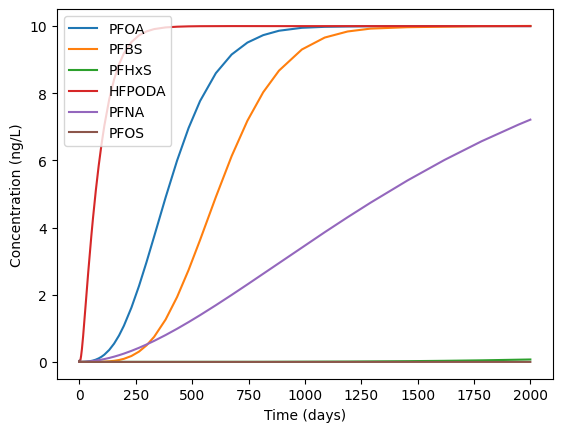

In [9]:
for comp in df.columns:
    if comp not in ['CHLORIDE', 'SULFATE', 'BICARBONATE', 'NITRATE']:
        plt.plot(df.index, 
                 df[comp].values,
                 label=comp)

plt.xlabel('Time (days)')
plt.ylabel('Concentration (ng/L)')
plt.legend(loc='upper left')

## Test with global mass transfer
Past compatibility

name    CHLORIDE       SULFATE   BICARBONATE       NITRATE
0.00  197.461213  1.000000e-16  1.000000e-16  1.000000e-16
0.00  197.461390  1.000000e-16  1.000000e-16  1.000000e-16
0.00  197.461566  1.000000e-16  1.000000e-16  1.000000e-16
0.00  197.463325  1.000000e-16  1.000000e-16  1.000000e-16
0.00  197.465075  1.000000e-16  1.000000e-16  1.000000e-16
...          ...           ...           ...           ...
1.43   42.596764  2.706016e+00  6.932279e+01  1.193530e+01
1.53   42.595912  2.706228e+00  6.932211e+01  1.193580e+01
1.73   42.594885  2.705956e+00  6.932129e+01  1.193803e+01
1.92   42.595032  2.706199e+00  6.932145e+01  1.193704e+01
2.08   42.595187  2.706829e+00  6.932151e+01  1.193494e+01

[226 rows x 4 columns]


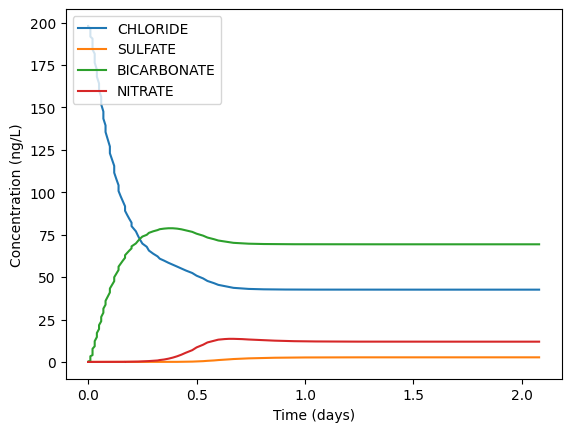

In [10]:
fn = './data/reg_test_input.xlsx'

IXcol = hsdmix.HSDMIX(fn)
# print(IXcol.__dict__)  ## shows kL, Ds in the ions data
t, u = IXcol.solve()



df = hsdmix.conv_iex_u(u, t, IXcol.ions)
print(df)

for comp in df.columns:
    if comp in ['CHLORIDE', 'SULFATE', 'BICARBONATE', 'NITRATE']:
        plt.plot(df.index, 
                 df[comp].values,
                 label=comp)

plt.xlabel('Time (days)')
plt.ylabel('Concentration (ng/L)')
plt.legend(loc='upper left')